Number of keys: 10, Average CPU%: 0.62%
Number of keys: 50, Average CPU%: 3.68%


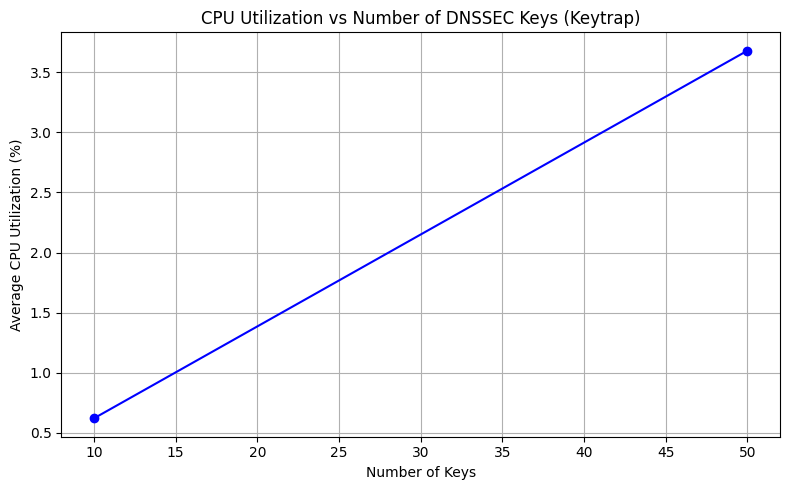

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Use the filenames you've uploaded
files = {
    10: "_docker_cpu_log_smith_10_key.csv",
    50: "_docker_cpu_log_smith_50_key.csv"
}

average_cpu_usage = []

# Container to track in all files
target_container = "local-dns-10.9.0.53"

for key_count, filename in files.items():
    try:
        df = pd.read_csv(filename)

        # Filter only the target container
        df = df[df["Container"] == target_container]

        # Clean and convert CPU values
        df["CPU%"] = df["CPU%"].astype(str).str.replace("%", "").astype(float)

        avg_cpu = df["CPU%"].mean()
        print(f"Number of keys: {key_count}, Average CPU%: {avg_cpu:.2f}%")

        average_cpu_usage.append((key_count, avg_cpu))
    except Exception as e:
        print(f"Error processing {filename}: {e}")

# If data is available, plot it
if average_cpu_usage:
    average_cpu_usage.sort()
    keys, cpu_values = zip(*average_cpu_usage)

    plt.figure(figsize=(8, 5))
    plt.plot(keys, cpu_values, marker='o', linestyle='-', color='blue')
    plt.title("CPU Utilization vs Number of DNSSEC Keys (Keytrap)")
    plt.xlabel("Number of Keys")
    plt.ylabel("Average CPU Utilization (%)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No valid CPU usage data collected.")
